## Denoising Data w/ FFT Notes
Source: [Denoising Data with FFT](https://www.youtube.com/watch?v=s2K1JfNR7Sc) by [Steve Brunton](https://www.youtube.com/c/Eigensteve)



In [46]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt   

In [49]:
# Setup Plot
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Setup Constants
PI = np.pi

In [50]:

# Create signal w/ 2 frequencies
dt = 0.001
t = np.arange(0, 1, dt)

# Sum of 2 different sin(50hz, 120hz)
F1 = 50
F2 = 120
f = np.sin(2*PI*F1*t) + np.sin(2*PI*F2*t)  

# Make clean copy
f_clean = f

# Add noise
f = f + 2.5*np.random.randn(len(t))


In [ ]:
# Plot 1 (Noisy vs. Clean Signal)
# plt.plot(t, f, color='c',label='Noisy')
# plt.plot(t,f_clean, color='k',label='Clean')

# plt.xlim(t[0], t[-1])
# plt.legend()
# plt.show()

In [51]:
# Compute the Fast Fourier Transform (FFT)

n = len(t)
# Compute FFT
fhat = np.fft.fft(f, n)

# Power Spectrum (power per fr)
PSD = fhat * np.conj(fhat) / n  # Power Spectral Density

# Create x-axis of frequencies
freq = (1/(dt*n)) * np.arange(n)

# Only plot the first half of complex number(magnitude)
L = np.arange(1,np.floor(n/2), dtype='int')


In [53]:
# Plot 
# fig, axs = plt.subplots(2,1)

# Plot 1 (Noisy vs. Clean Signal)
# plt.sca(axs[0])
# plt.plot(t,f, color='c',label='Noisy')
# plt.plot(t,f_clean,color='k',label='Clean')

# plt.xlim(t[0],t[-1])
# plt.legend()

# Plot 2 (Power Spectrum (Hz), Power)
# x=Power Spectrum (Hz) 
# y=Power
# plt.sca(axs[1])
# plt.plot(freq[L], PSD[L], color='c',label='Noisy')
# plt.xlim(freq[L[0]],freq[L[-1]])
# plt.legend()

# plt.xlabel('Power Spectrum (Hertz)')
# plt.ylabel('Power')

# plt.show()

In [54]:
# Use the PSD to filter out noise below a certain threshold
indices = PSD > 100         # Find all freqs above threshold
PSDclean = PSD * indices    # Zero out all other values
fhat = indices * fhat       # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat)   # Inverse FFT for filtered time signal

c:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


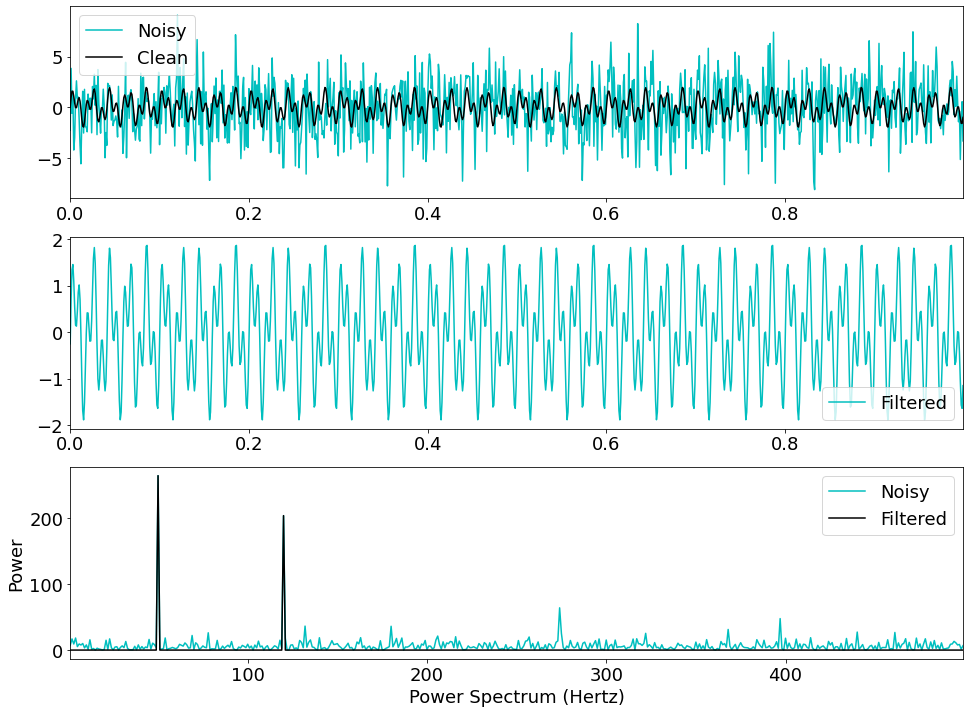

In [55]:
# All Three Plots
fig, axs = plt.subplots(3,1)

# Plot 1 (Noisy vs. Clean Signal)
plt.sca(axs[0])
plt.plot(t,f, color='c',label='Noisy')
plt.plot(t,f_clean,color='k',label='Clean')

plt.xlim(t[0],t[-1])
plt.legend()

# Plot 2 (Filtered Signal)
plt.sca(axs[1])
plt.plot(t, ffilt, color='c',label='Filtered')
# plt.plot(t,f_clean,color='k',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

# Plot 3 (Noisy vs Filtered) 
# x=Power Spectrum (Hz) 
# y=Power
plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c',label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k',label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.xlabel('Power Spectrum (Hertz)')
plt.ylabel('Power')

plt.show()